In [1]:
import pandas as pd
import numpy as np

file='../raw_data/1.0.3/training_data.csv'
df=pd.read_csv(file)
df.head()

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN


In [2]:
def drop_duplicates(data):
    doublon=data[['Patient ID','Additional ID']].dropna()
    liste_couple=[]
    for i in range(len(doublon)):
        min_id=min(doublon.iloc[i]['Patient ID'],doublon.iloc[i]['Additional ID'])
        max_id=max(doublon.iloc[i]['Patient ID'],doublon.iloc[i]['Additional ID'])
        if [min_id,max_id] not in liste_couple:
            liste_couple.append([min_id,max_id])
    list_id_drop=np.array(liste_couple)[:,1]
    data_drop_dup=data[~data['Patient ID'].isin(list_id_drop)]
    return data_drop_dup

In [3]:
df_drop_dup=drop_duplicates(df)
df_drop_dup

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,85340,AV+PV+TV+MV,Child,Male,105.0,16.6,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
938,85341,AV+PV+TV+MV,Child,Male,92.0,15.2,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
939,85343,AV+PV+TV+MV,Child,Female,97.0,13.5,False,Present,MV+TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
940,85345,AV+PV,Child,Female,132.0,38.1,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN


In [4]:
rec=df_drop_dup['Recording locations:'].str.split('+')
rec

0      [AV, PV, TV, MV]
1      [AV, PV, TV, MV]
2      [AV, PV, TV, MV]
3      [AV, PV, TV, MV]
4      [AV, PV, TV, MV]
             ...       
937    [AV, PV, TV, MV]
938    [AV, PV, TV, MV]
939    [AV, PV, TV, MV]
940            [AV, PV]
941        [AV, PV, TV]
Name: Recording locations:, Length: 872, dtype: object

In [5]:
ls=[]
for i in df_drop_dup.index:
    r=df_drop_dup.loc[i, 'Recording locations:'].split('+')
    l=np.random.choice(r)
    ls.append(l)
ls

['AV',
 'AV',
 'TV',
 'AV',
 'AV',
 'PV',
 'MV',
 'AV',
 'TV',
 'MV',
 'TV',
 'PV',
 'MV',
 'MV',
 'TV',
 'AV',
 'TV',
 'PV',
 'TV',
 'PV',
 'AV',
 'PV',
 'MV',
 'AV',
 'AV',
 'AV',
 'MV',
 'AV',
 'MV',
 'AV',
 'MV',
 'PV',
 'TV',
 'TV',
 'TV',
 'TV',
 'MV',
 'AV',
 'MV',
 'PV',
 'MV',
 'PV',
 'PV',
 'MV',
 'MV',
 'PV',
 'PV',
 'TV',
 'MV',
 'MV',
 'MV',
 'AV',
 'AV',
 'TV',
 'MV',
 'AV',
 'TV',
 'PV',
 'PV',
 'AV',
 'PV',
 'TV',
 'MV',
 'TV',
 'MV',
 'PV',
 'MV',
 'MV',
 'MV',
 'MV',
 'TV',
 'MV',
 'TV',
 'AV',
 'AV',
 'AV',
 'TV',
 'AV',
 'AV',
 'AV',
 'AV',
 'PV',
 'AV',
 'MV',
 'PV',
 'MV',
 'MV',
 'PV',
 'MV',
 'MV',
 'MV',
 'PV',
 'MV',
 'MV',
 'MV',
 'MV',
 'AV',
 'MV',
 'MV',
 'MV',
 'TV',
 'TV',
 'MV',
 'TV',
 'TV',
 'AV',
 'TV',
 'MV',
 'AV',
 'MV',
 'MV',
 'AV',
 'MV',
 'AV',
 'AV',
 'TV',
 'AV',
 'PV',
 'MV',
 'AV',
 'PV',
 'TV',
 'TV',
 'MV',
 'AV',
 'PV',
 'PV',
 'MV',
 'AV',
 'TV',
 'AV',
 'AV',
 'TV',
 'TV',
 'MV',
 'MV',
 'AV',
 'TV',
 'TV',
 'MV',
 'AV',
 'MV',
 'PV',

In [6]:
len(ls)

872

In [7]:
df_new=pd.DataFrame({'Patient_id': df_drop_dup['Patient ID'], 
                     'select': ls
                    })
df_new

,Patient_id,select
0,2530,AV
1,9979,AV
2,9983,TV
3,13918,AV
4,14241,AV
...,...,...
937,85340,PV
938,85341,MV
939,85343,MV
940,85345,PV


In [11]:

def load_npy(a,b):
    file=f"../raw_data/1.0.3/tmp_dir_2/{a}_{b}.npy"
    v=np.load(file)[0:6000]
    return v

In [12]:
la=[]
for i in df_new.index:
    la.append(load_npy(df_new.Patient_id[i], df_new.select[i]))
la

[array([-0.01296997,  0.03189087,  0.01580811, ...,  0.00881958,
         0.01272583,  0.01028442], dtype=float32),
 array([0.05044556, 0.11642456, 0.09463501, ..., 0.00805664, 0.02471924,
        0.04577637], dtype=float32),
 array([0.02651978, 0.01873779, 0.02096558, ..., 0.02612305, 0.02496338,
        0.00671387], dtype=float32),
 array([ 0.        ,  0.00100708,  0.00921631, ..., -0.00869751,
        -0.01571655, -0.03366089], dtype=float32),
 array([ 0.0067749 , -0.00115967, -0.0050354 , ...,  0.00253296,
         0.00167847,  0.00280762], dtype=float32),
 array([ 0.00714111,  0.0145874 , -0.01889038, ...,  0.00143433,
         0.00061035,  0.00039673], dtype=float32),
 array([ 0.04574585,  0.01950073,  0.00326538, ..., -0.03530884,
        -0.03869629, -0.04174805], dtype=float32),
 array([ 0.02697754,  0.0199585 ,  0.012146  , ..., -0.01068115,
        -0.01605225, -0.00759888], dtype=float32),
 array([-0.19134521, -0.08276367, -0.01687622, ...,  0.03384399,
         0.01577759

In [13]:
X_rec=np.expand_dims(la, axis=-1)
X_rec.shape

(872, 6000, 1)

In [14]:
y_rec=df_drop_dup.Outcome.map({'Abnormal': 1, 'Normal': 0})
y_rec.shape

(872,)

In [15]:
y_rec.value_counts()

0    473
1    399
Name: Outcome, dtype: int64

In [16]:
from tensorflow.keras.layers import Masking, LSTM, Conv1D, Dense, MaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall

In [17]:
from sklearn.model_selection import train_test_split

X_rec_train, X_rec_test, y_rec_train, y_rec_test= train_test_split(X_rec, y_rec, test_size=0.3, random_state=1)

In [21]:
model_rec=Sequential()
model_rec.add(Masking(mask_value=-10, input_shape=(6000,1)))
model_rec.add(Conv1D(24, kernel_size=15, strides=2, activation='relu'))
model_rec.add(MaxPool1D(3, strides=2))
model_rec.add(Conv1D(48, kernel_size=7, strides=2, activation='relu'))
model_rec.add(MaxPool1D(3, strides=2))
model_rec.add(Conv1D(96, kernel_size=7, strides=2, activation='relu'))
model_rec.add(MaxPool1D(3, strides=2))
model_rec.add(LSTM(units=20, return_sequences=True))
model_rec.add(LSTM(units=20, return_sequences=True))
model_rec.add(LSTM(units=20, return_sequences=True))
model_rec.add(LSTM(units=20, return_sequences=True))
model_rec.add(LSTM(units=20, return_sequences=False))
model_rec.add(Dense(1, activation='sigmoid'))

model_rec.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 6000, 1)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2993, 24)          384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1496, 24)         0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 745, 48)           8112      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 372, 48)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 183, 96)          

In [22]:
adam=Adam(learning_rate=0.001)
model_rec.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy', Recall()])

In [34]:
es=EarlyStopping(patience=10, restore_best_weights=True, monitor='val_recall')
history=model_rec.fit(X_rec_train, y_rec_train, batch_size=64, epochs=150, validation_split=0.2, callbacks=[es])

Epoch 1/150
8/8 [==============================] - 1s 104ms/step - loss: 0.1424 - accuracy: 0.9611 - recall: 0.9744 - val_loss: 1.3499 - val_accuracy: 0.4918 - val_recall: 0.4906
Epoch 2/150
8/8 [==============================] - 1s 103ms/step - loss: 0.1110 - accuracy: 0.9652 - recall: 0.9615 - val_loss: 1.3744 - val_accuracy: 0.5328 - val_recall: 0.4340
Epoch 3/150
8/8 [==============================] - 1s 103ms/step - loss: 0.0791 - accuracy: 0.9857 - recall: 0.9872 - val_loss: 1.3757 - val_accuracy: 0.5328 - val_recall: 0.4906
Epoch 4/150
8/8 [==============================] - 1s 104ms/step - loss: 0.0693 - accuracy: 0.9898 - recall: 0.9872 - val_loss: 1.4316 - val_accuracy: 0.5246 - val_recall: 0.4528
Epoch 5/150
8/8 [==============================] - 1s 103ms/step - loss: 0.0634 - accuracy: 0.9898 - recall: 0.9872 - val_loss: 1.4915 - val_accuracy: 0.5164 - val_recall: 0.4151
Epoch 6/150
8/8 [==============================] - 1s 102ms/step - loss: 0.0587 - accuracy: 0.9898 - reca

In [35]:
es.best_epoch

4

In [36]:
model_rec.evaluate(X_rec_test, y_rec_test)

9/9 [==============================] - 0s 16ms/step - loss: 1.4117 - accuracy: 0.5649 - recall: 0.5357


[1.4116657972335815, 0.5648854970932007, 0.5357142686843872]

In [41]:
def plot_loss_recall(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=2)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['recall'])
    ax2.plot(history.history['val_recall'])
    ax2.set_title('RECALL')
    ax2.set_ylabel('Recall')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=2)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

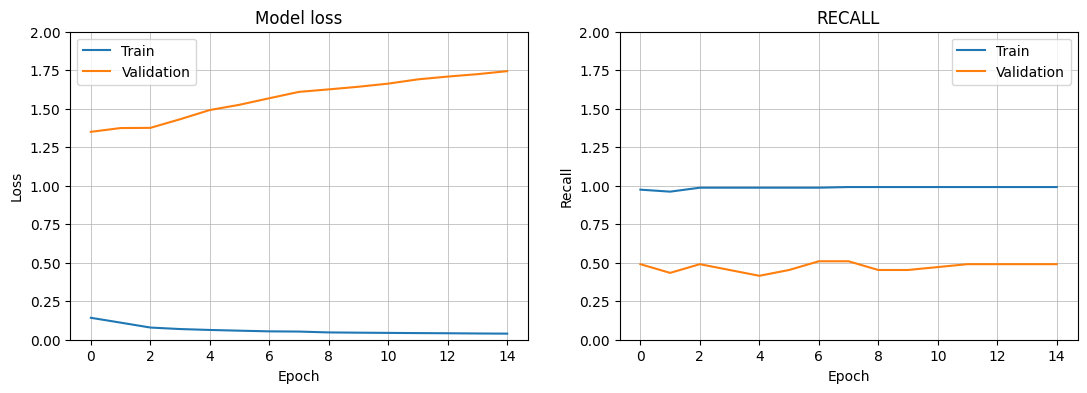

In [42]:
import matplotlib.pyplot as plt
plot_loss_recall(history)